In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


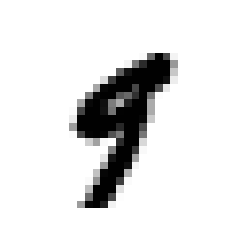

In [7]:
import matplotlib
some_digit=X[36000]
some_digit_image = some_digit.reshape(28,28)
some_digit_image
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [8]:
y[36000]

'9'

In [9]:
X_train,y_train,X_test,y_test = X[:60000],y[:60000],X[60000:],y[60000:]

In [11]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

## 이진분류기 훈련

In [29]:
y_train_9 = (y_train == '9')
y_test_9 = (y_test == '9')


In [30]:
sum(y_train_9)

5949

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 5,random_state=42)
sgd_clf.fit(X_train,y_train_9)

SGDClassifier(max_iter=5, random_state=42)

In [32]:
sgd_clf.predict([some_digit])

array([False])

In [34]:
# 교차 검증
from sklearn.model_selection import StratifiedKFold,cross_val_score
cross_val_score(sgd_clf,X_train,y_train_9,cv=3,scoring='accuracy')

array([0.9453 , 0.94385, 0.91885])

In [35]:
from sklearn.base import BaseEstimator
class Never9Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [36]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf,X_train,y_train_9,cv=3,scoring='accuracy')

array([0.90135, 0.89935, 0.90185])

## 오차 행렬

In [37]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_9,cv=3)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9,y_train_pred) # true_y,pred_y

array([[52878,  1173],
       [ 2667,  3282]], dtype=int64)

## 정밀도와 재현율

In [40]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_9,y_train_pred) # 정밀도

0.7367003367003367

In [41]:
recall_score(y_train_9,y_train_pred) # 재현율

0.5516893595562279

In [42]:
from sklearn.metrics import f1_score
f1_score(y_train_9,y_train_pred) # f1 score

0.6309111880046135

In [43]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-202925.92224586])

In [46]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)

In [47]:
y_some_digit_pred

array([False])

In [48]:
threshold = -250000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [50]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_9,cv=3,method = 'decision_function') # 결정 점수 반환
y_scores

array([   -6121.36997356,  -248778.69662691,  -455783.0598327 , ...,
        -867220.6109378 , -1711367.84550114, -1496393.39289193])

In [51]:
len(y_scores)

60000

In [52]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_9,y_scores)

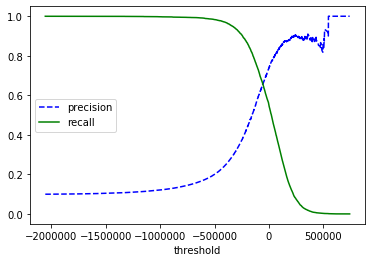

In [57]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='recall')
    plt.xlabel('threshold')
    plt.legend(loc='center left')
#     plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [59]:
y_train_pred_90 = (y_scores>90)
precision_score(y_train_5,y_train_pred_90)

0.736806647204132

In [60]:
recall_score(y_train_5,y_train_pred_90)

0.5515212640779963

## roc curve

In [61]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_9,y_scores)

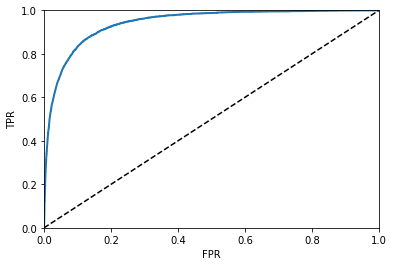

In [62]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
plot_roc_curve(fpr,tpr)
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9,y_scores)

0.9424104816939807

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_9,cv=3,method='predict_proba')
y_probas_forest

array([[0.04, 0.96],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [65]:
y_scores_forest = y_probas_forest[:,1] # 양성 클래스에 대한 확률
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

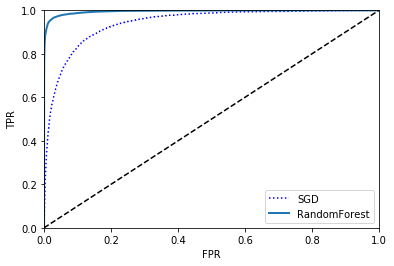

In [66]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RandomForest')
plt.legend(loc='lower right')
plt.show()

In [67]:
roc_auc_score(y_train_9,y_scores_forest)

0.9952284858725549